In [189]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [190]:
filename = "/content/CarPrice.csv"

df = pd.read_csv(filename)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [191]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [193]:
#cleaning data
#checking for null values
missing_values = df.isna().sum()
print(missing_values)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [194]:
#checking for duplicate values
duplicate_values = df.duplicated().sum()
print(duplicate_values)

0


In [195]:
#dropping unnecesary columns
df_copy = df.drop(["car_ID","CarName", "aspiration","drivewheel","enginelocation"], axis=1)

In [196]:
#converting categorical values into numerical
df_copy["fueltype"].replace({'gas':0,'diesel':1}, inplace=True)
df_copy["doornumber"].replace({'two':0,'four':1}, inplace=True)
df_copy["fuelsystem"].replace({'mpfi': 0, '2bbl': 1, 'idi': 2, '1bbl': 3, 'spdi': 4, '4bbl': 5, 'mfi': 6, 'spfi': 7}, inplace=True)
df_copy["carbody"].replace({'sedan': 1, 'hatchback': 2, 'wagon': 3, 'hardtop': 4, 'convertible': 5}, inplace=True)
df_copy["cylindernumber"].replace({'four': 3, 'six': 5, 'five': 4, 'eight': 6, 'two': 1, 'three': 2, 'twelve': 7}, inplace=True)
df_copy["enginetype"].replace({
    'ohc': 1,
    'ohcf': 2,
    'ohcv': 3,
    'dohc': 4,
    'l': 5,
    'rotor': 6,
    'dohcv': 7
}
, inplace=True)
df_copy["fuelsystem"].value_counts()

0    94
1    66
2    20
3    11
4     9
5     3
6     1
7     1
Name: fuelsystem, dtype: int64

In [197]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginetype        205 non-null    int64  
 10  cylindernumber    205 non-null    int64  
 11  enginesize        205 non-null    int64  
 12  fuelsystem        205 non-null    int64  
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

In [198]:
#scaling the data 
scaler = StandardScaler()
df_copy_scaled = scaler.fit_transform(df_copy)
df_copy_scaled_df = pd.DataFrame(df_copy_scaled, columns=df_copy.columns)
df_copy_scaled_df

,symboling,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-0.328798,-1.130388,3.217410,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,1.637278,...,0.074449,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-0.328798,-1.130388,3.217410,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,1.637278,...,0.074449,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-0.328798,-1.130388,0.182583,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.913911,...,0.604046,-0.760049,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,-0.328798,0.884652,-0.829026,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.532821,...,-0.431076,-0.760049,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,-0.328798,0.884652,-0.829026,0.107110,0.207256,0.230001,0.235942,0.516807,-0.532821,...,0.218885,-0.760049,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.328798,0.884652,-0.829026,1.721873,1.198549,1.398245,0.728239,0.763241,-0.532821,...,0.339248,-0.760049,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752
201,-1.476452,-0.328798,0.884652,-0.829026,1.721873,1.198549,1.351515,0.728239,0.949992,-0.532821,...,0.339248,-0.760049,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810
202,-1.476452,-0.328798,0.884652,-0.829026,1.721873,1.198549,1.398245,0.728239,0.878757,0.913911,...,1.109571,-0.760049,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983
203,-1.476452,3.041381,0.884652,-0.829026,1.721873,1.198549,1.398245,0.728239,1.273437,-0.532821,...,0.435538,0.775025,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582


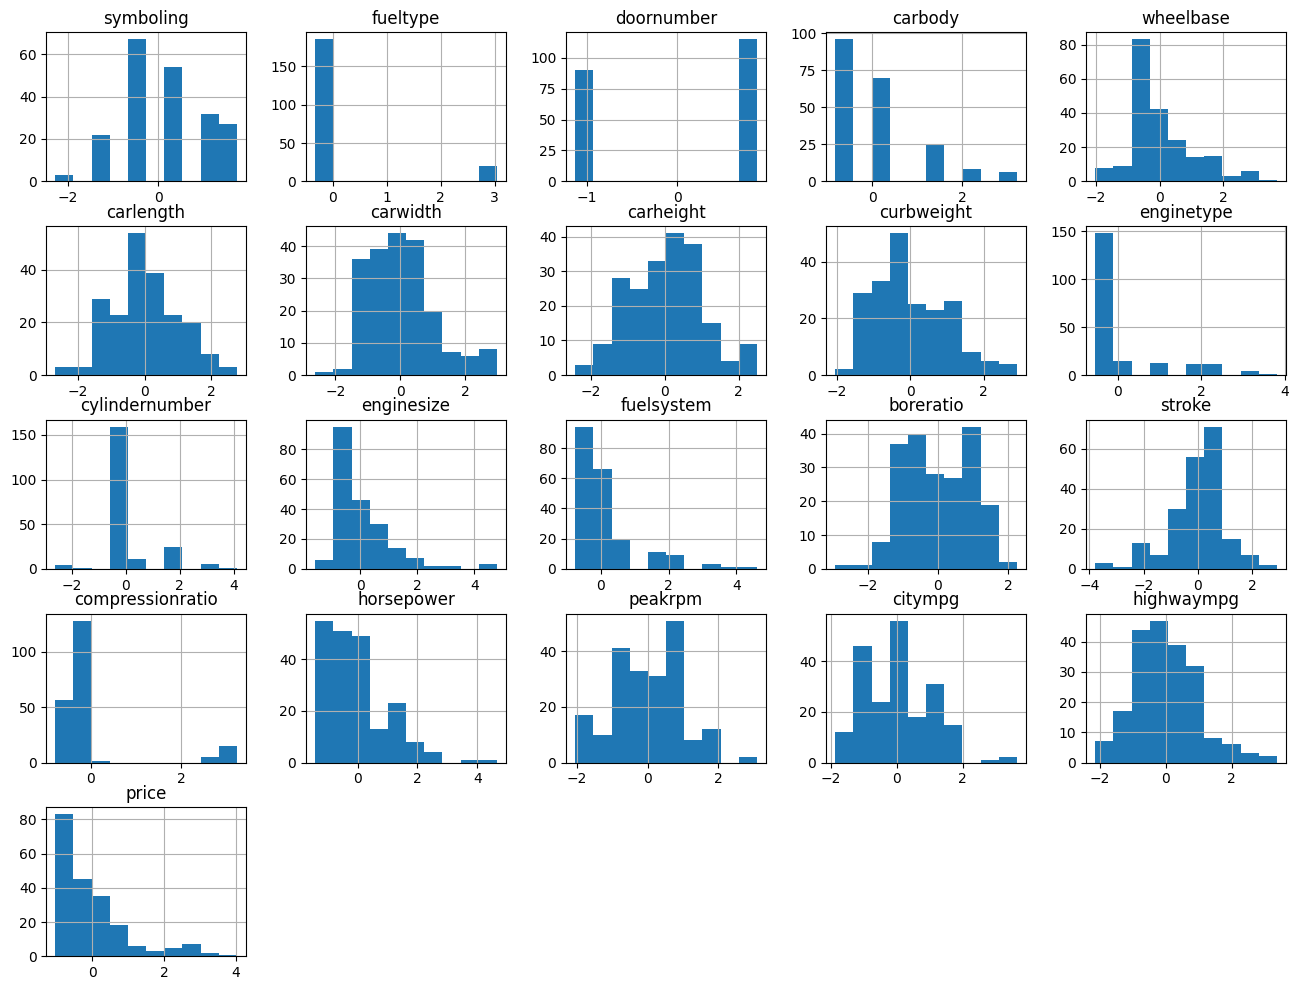

In [199]:
#plotting a histogram
df_copy_scaled_df.hist(figsize=(16,12))
plt.show()

In [200]:
#checking correlation of target variable with all variables
corr_matrix = df_copy_scaled_df.corr()["price"]
print(corr_matrix.sort_values(ascending=False))

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.726096
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
enginetype          0.290890
carheight           0.119336
carbody             0.107031
fueltype            0.105679
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
peakrpm            -0.085267
fuelsystem         -0.275217
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


In [201]:
attributes = ["price","enginesize","curbweight","horsepower","carwidth","carlength","cylindernumber","wheelbase","boreratio","enginetype","fuelsystem","citympg","highwaympg"]

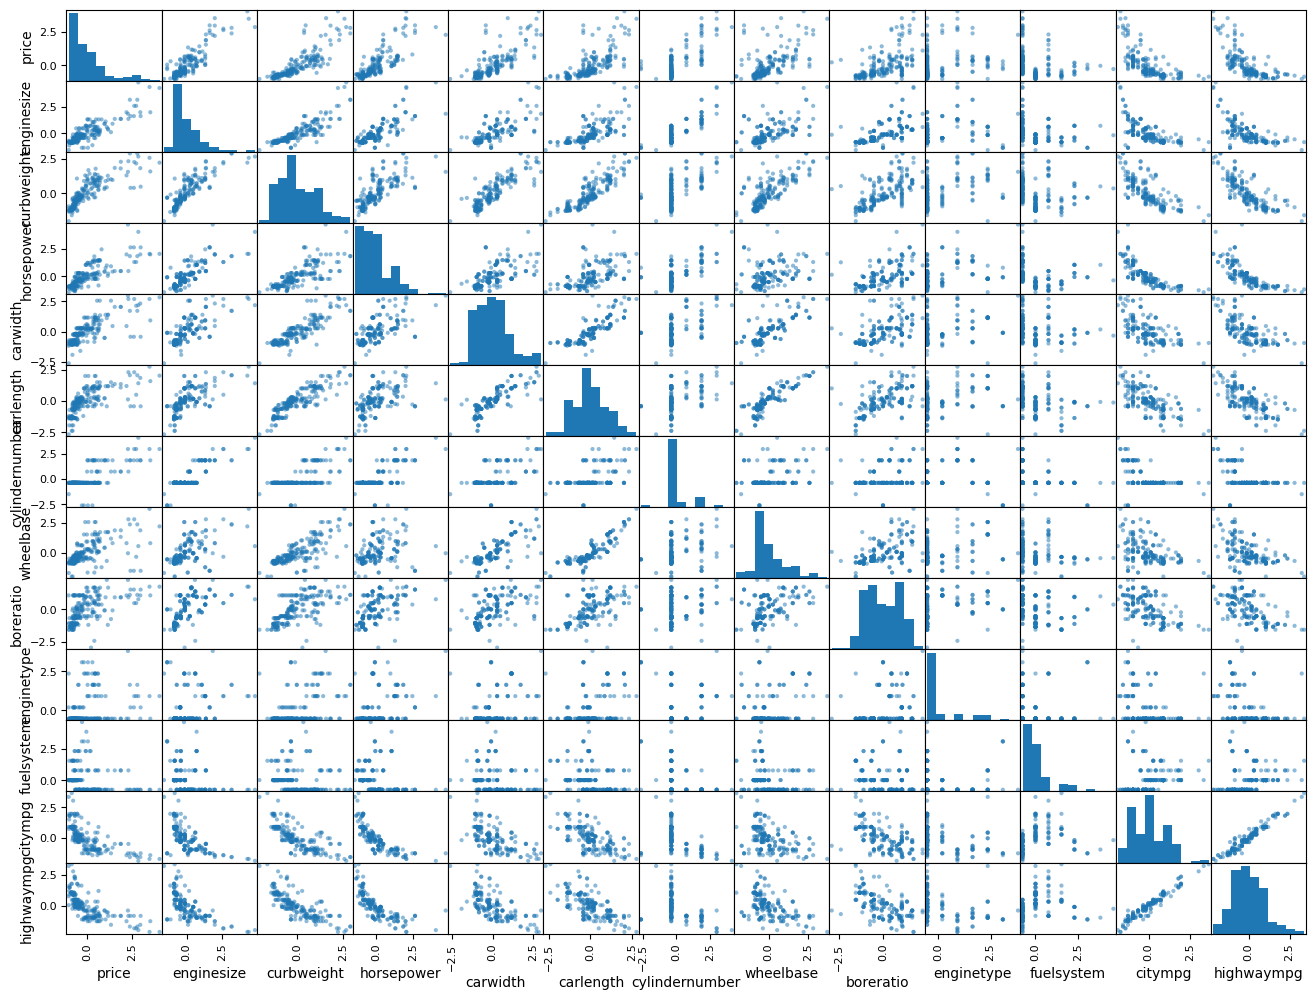

In [202]:
#using a scatter matrix
scatter_matrix(df_copy_scaled_df[attributes],figsize=(16,12))
plt.show()

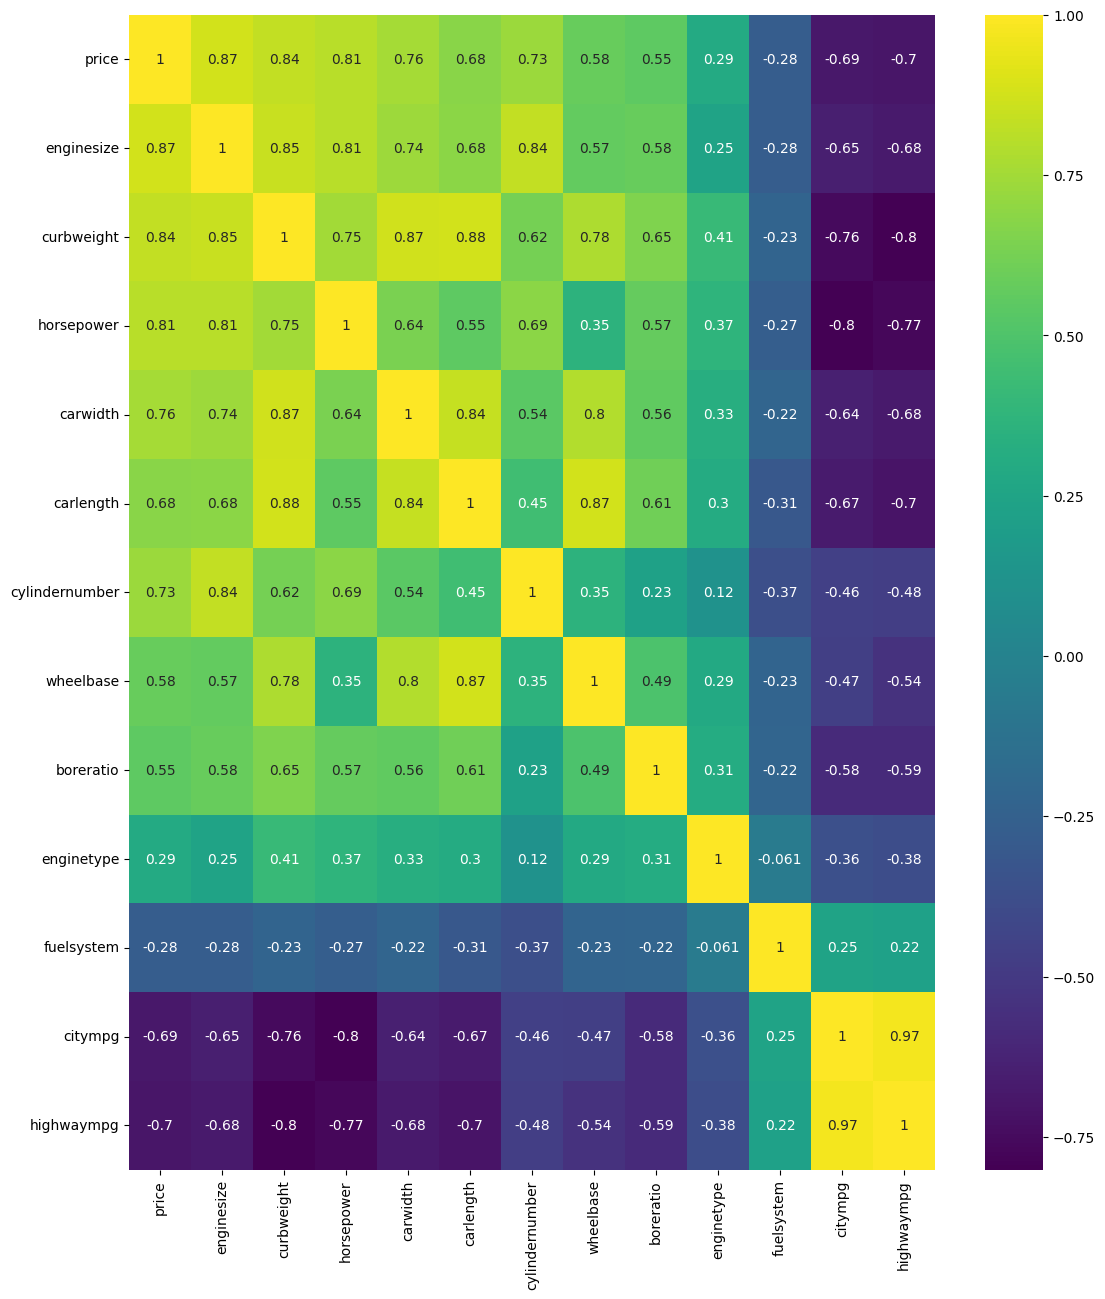

In [203]:
#finding correlation
corr_matrix = df_copy_scaled_df[attributes].corr()
plt.figure(figsize = (13,15))
sns.heatmap(corr_matrix,cmap="viridis",annot=True)
plt.show()

In [204]:
#attributes = ["price","enginesize","curbweight","horsepower","carwidth","carlength","cylindernumber","wheelbase","boreratio","enginetype","fuelsystem","citympg","highwaympg"]
df_copy_scaled_df.drop(columns = [col for col in df_copy_scaled_df.columns if col not in attributes], inplace=True, axis=1)
df_copy_scaled_df

,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,-1.690772,-0.426521,-0.844782,-0.014566,1.637278,-0.378892,0.074449,-0.760049,0.519071,0.174483,-0.646553,-0.546059,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,1.637278,-0.378892,0.074449,-0.760049,0.519071,0.174483,-0.646553,-0.546059,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,0.913911,1.872496,0.604046,-0.760049,-2.404880,1.264536,-0.953012,-0.691627,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.532821,-0.378892,-0.431076,-0.760049,-0.517266,-0.053668,-0.186865,-0.109354,0.084485
4,0.107110,0.207256,0.230001,0.516807,-0.532821,0.746802,0.218885,-0.760049,-0.517266,0.275883,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,-0.532821,-0.378892,0.339248,-0.760049,1.666445,0.250533,-0.340094,-0.400490,0.447752
201,1.721873,1.198549,1.351515,0.949992,-0.532821,-0.378892,0.339248,-0.760049,1.666445,1.416637,-0.953012,-0.837195,0.723810
202,1.721873,1.198549,1.398245,0.878757,0.913911,1.872496,1.109571,-0.760049,0.926204,0.757535,-1.106241,-1.128332,1.029983
203,1.721873,1.198549,1.398245,1.273437,-0.532821,1.872496,0.435538,0.775025,-1.183483,0.047732,0.119594,-0.546059,1.153582


In [205]:
#splitting data
X=df_copy_scaled_df.drop("price", axis=1)
y=df_copy_scaled_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [206]:
#building Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [207]:
#predicting

y_pred = model.predict(X_test)
print(y_pred)

[-0.85657455  0.97288218  0.18599742 -1.81874866 -0.28522078  0.22053411
 -0.85803316 -0.88595478  1.3621343  -0.82595932  0.52657871  3.12960484
 -0.87031495 -0.06580543 -0.90083743  0.15343353 -0.02902737  0.81771614
 -0.48117324 -0.88228758 -0.23709921  0.2437539  -0.03872819  0.23888192
  1.14873157 -0.84278218 -0.74268509  0.26779484 -0.74524252 -0.93208793
 -0.41795248 -0.18523508  0.85758701 -0.18157073 -0.90640098  1.7174046
 -0.43436429  0.41201103 -0.90061942  2.8381941  -0.91918525]


In [208]:
#R squared
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.7819472251517853


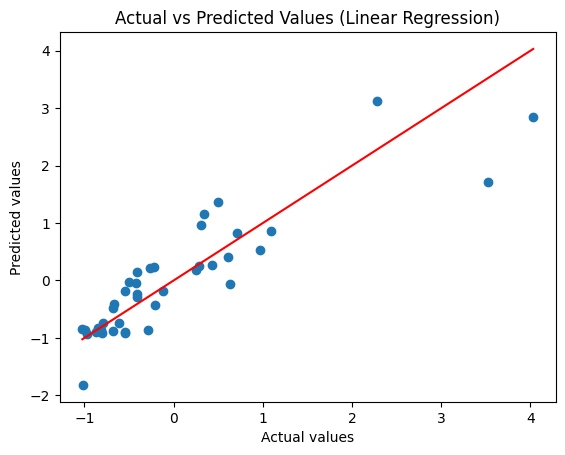

In [210]:
#plotting predicted values against actual values
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values (Linear Regression)")

# Plot a line of best fit
x = [min(y_test), max(y_test)]
y = [min(y_test), max(y_test)]
plt.plot(x, y, 'r')
plt.show()

Inference:
R2 Score:  0.7819